# Loss functions

## Parametrized models
Many machine learning models have the form $\hat{y} = g(x, \theta)$, where the function $g$ fixes the structure of the problem and $\theta$ is a set of parameters.
For example a linear regression model:
$\hat{y} = g(x,\theta) = \theta_1 x_1 + \dots + \theta_d x_d.$

Choosing a particular $\theta$ given some training data
$x_1, \dots, x_n, y_1, \dots, y_n$ is called training or fitting the model to the data.
For example in the linear regression model we train the model using least squares, i.e., choose $\theta$ to minimize:
$\sum_i^n (\hat{y}_i - y_i)^2 = \sum_i^n (g(x, \theta) - y_i)^2$

## Loss function
A loss function $l(\hat{y}, y) : \mathbb{R}^{m} \times \mathbb{R}^{m} → \mathbb{R}$ quantifies how close is $\hat{y}$ to $y$, i.e. how good is our model in fitting the data. First, we define the residuals as $r = \hat{y} - y$, i.e., the difference between the predicted and observed values. Note, that some literature defines residuals in reversed order as $y - \hat{y}$.

Examples of loss functions:
*   quadratic loss: $l(\hat{y}, y) = (\hat{y} - y_i)^2$
*   absolute loss: $l(\hat{y}, y) = \lvert \hat{y} - y_i \rvert$

The empirical risk is the average loss over data points,
$\mathcal{L}(\theta)=\frac{1}{n}\sum_i^n l(\hat{y}_i, y_i) = \frac{1}{n}\sum_i^n l(g(x_i,\theta),y_i)$.

Finding the best $\theta$ (fitting the model)is also denoted as empirical risk minimization (ERM).


The above was a short recap of the slides. Below we have dataset on which we will train regression models with diferent loss functions and see, how the predictions change based on the loss function.

## Quantile regression

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

First, we will generate heteroscedastic data, i.e., data with non-constant variance, where the variance of the data will grow with $x$ values.

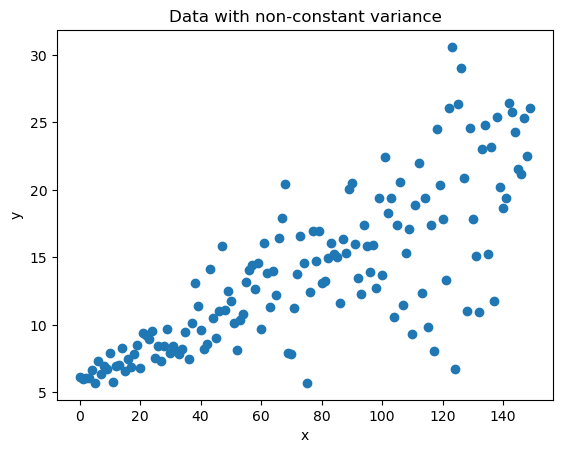

In [15]:
## Generate some data with non-constant variance
np.random.seed(1)
x_ = np.arange(150).reshape(-1,1)
intercept_ = 6
slope_ = 0.1
## Non constant variance
var_ = 0.1 + 0.05 * x_
## non constant error
error_ = np.random.normal(size = (x_.size,1), loc = 0.0, scale = var_)
## Regression equation
y_ = intercept_ + slope_ * x_ + error_

plt.figure(3)
plt.scatter(x_, y_)
plt.xlabel("x")
plt.ylabel("y")
_ = plt.title("Data with non-constant variance")

In the cell below, we fit a linear regression and visualise the fit.

Mean squared error: 13.16
Variance score: 0.62


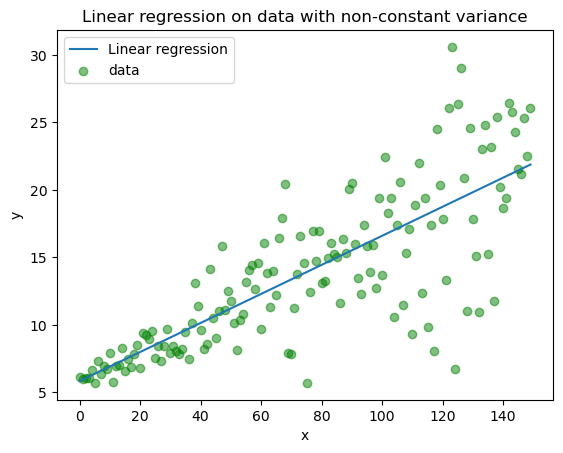

In [16]:
## Try to fit a linear regression
model_LR = LinearRegression(fit_intercept = True)
model_LR.fit(x_, y_)

y_pred_lin_reg = model_LR.predict(x_)

print("Mean squared error: {0:.2f}"
      .format(np.mean((y_pred_lin_reg - y_) ** 2)))
print('Variance score: {0:.2f}'.format(model_LR.score(x_, y_)))

## Plot the regression
plt.figure(4)
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x_, y_pred_lin_reg, label=f"Linear regression")
plt.scatter(x_, y_, alpha=0.5, color = "green", label="data")
plt.legend()
_ = plt.title("Linear regression on data with non-constant variance")

Below, we fit a Quantile regression model with $\tau = 0.5$ to the heteroskedastic data and again visualize the fit

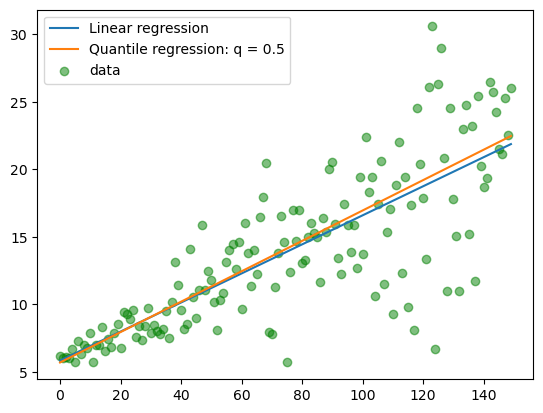

In [17]:
from sklearn.linear_model import QuantileRegressor
qr = QuantileRegressor(quantile=0.5, alpha=0, solver = "highs")
y_pred = qr.fit(x_, y_.flatten()).predict(x_)


plt.plot(x_, y_pred_lin_reg, label=f"Linear regression")
plt.plot(x_, y_pred, label=f"Quantile regression: q = 0.5")
plt.scatter(x_, y_, alpha=0.5, color = "green", label="data")
_ = plt.legend()

We can see that the fits are almost identical.
Compare the RMSE (`mean_squared_error` with `squared=False`)
 and MAE (`mean_absolute_error`) of the models. Which model has a lower RMSE? Which model has a lower MAE?

Your task here is to calculate the RMSE and MAE for the estimates of linear regression (LR) and the estimates of quantile regression (QR).

In [18]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

LR_rmse = mean_squared_error(y_, y_pred_lin_reg, squared=False)
LR_mae = mean_absolute_error(y_, y_pred_lin_reg)
QR_rmse = mean_squared_error(y_, y_pred, squared=False)
QR_mae =  mean_absolute_error(y_, y_pred)

print(f"RMSE LR: {LR_rmse:.3f} MAE LR: {LR_mae:.3f}")
print(f"RMSE QR: {QR_rmse:.3f} MAE QR: {QR_mae:.3f}")
print("Model with lowest MSE: LR, model with lowest MAE: QR")

RMSE LR: 3.628 MAE LR: 2.523
RMSE QR: 3.642 MAE QR: 2.513
Model with lowest MSE: LR, model with lowest MAE: QR


Using quantile regression, we are able to determine a line dividing the response values into $\tau$ quantiles. Below, we have an example for $\tau=0.1$ and $\tau=0.9$, bounding 80% of the data.

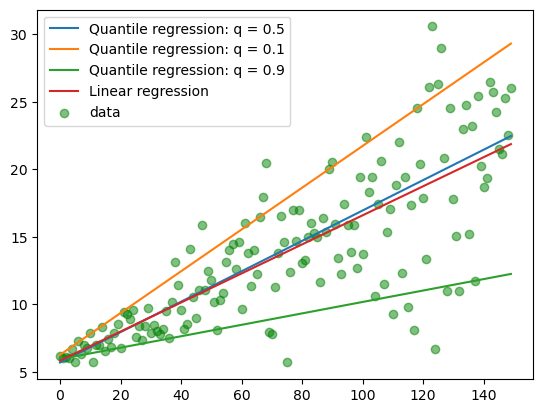

In [19]:
qr_10 = QuantileRegressor(quantile=0.9, alpha=0, solver = "highs") # 0.1 quantile regression
qr_90 = QuantileRegressor(quantile=0.1, alpha=0, solver = "highs") # 0.9 quantile regression
y_pred_05 = qr_10.fit(x_, y_.reshape(-1)).predict(x_)
y_pred_95 = qr_90.fit(x_, y_.reshape(-1)).predict(x_)

plt.plot(x_, y_pred, label=f"Quantile regression: q = 0.5")
plt.plot(x_, y_pred_05, label=f"Quantile regression: q = 0.1")
plt.plot(x_, y_pred_95, label=f"Quantile regression: q = 0.9")
plt.plot(x_, y_pred_lin_reg, label=f"Linear regression")
plt.scatter(x_, y_, alpha=0.5, color = "green", label="data")
_ = plt.legend()


Now try to add the lines covering 90% of the $y$ values to the plot, i.e., 90% confidence intervals for the response. To calculate the lines select the right values of $\tau$ paremeter in the quantile regression. Finally, plot the lines and the data.

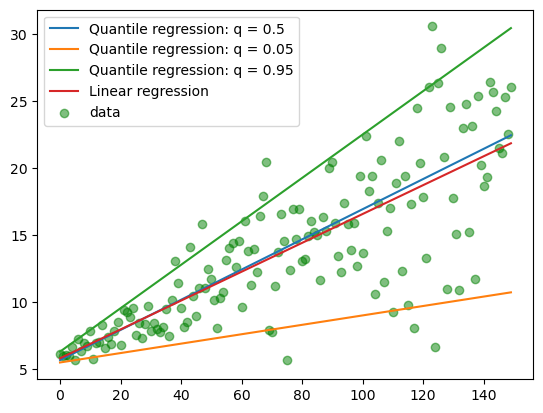

In [20]:
qr_05 =  QuantileRegressor(quantile=0.05, alpha=0, solver='highs')# 0.05 quantile regression
qr_95 =  QuantileRegressor(quantile=0.95, alpha=0, solver='highs')# 0.95 quantile regression
y_pred_05 = qr_05.fit(x_, y_.reshape(-1)).predict(x_)# fit qr_05 and get estimate for training data
y_pred_95 = qr_95.fit(x_, y_.reshape(-1)).predict(x_)# fit qr_95 and get estimate for training data

plt.plot(x_, y_pred, label=f"Quantile regression: q = 0.5")
plt.plot(x_, y_pred_05, label=f"Quantile regression: q = 0.05")
plt.plot(x_, y_pred_95, label=f"Quantile regression: q = 0.95")
plt.plot(x_, y_pred_lin_reg, label=f"Linear regression")
plt.scatter(x_, y_, alpha=0.5, color = "green", label="data")
_ = plt.legend()

Good job! Around 90% of the data should lie between the green and orange line.

**Optional task:**
If you have some time left, add more Quantile regession estimates to get approximate distribution of the data.

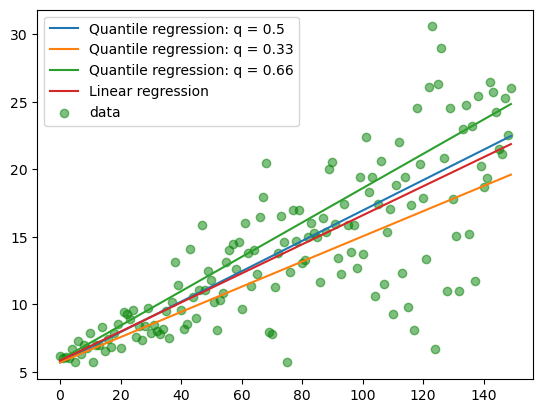

In [21]:
# more q's with plot
# 33%
qr_33 =  QuantileRegressor(quantile=0.33, alpha=0, solver='highs')# 0.05 quantile regression
qr_66 =  QuantileRegressor(quantile=0.66, alpha=0, solver='highs')# 0.95 quantile regression
y_pred_33 = qr_33.fit(x_, y_.reshape(-1)).predict(x_)# fit qr_05 and get estimate for training data
y_pred_66 = qr_66.fit(x_, y_.reshape(-1)).predict(x_)# fit qr_95 and get estimate for training data

plt.plot(x_, y_pred, label=f"Quantile regression: q = 0.5")
plt.plot(x_, y_pred_33, label=f"Quantile regression: q = 0.33")
plt.plot(x_, y_pred_66, label=f"Quantile regression: q = 0.66")
plt.plot(x_, y_pred_lin_reg, label=f"Linear regression")
plt.scatter(x_, y_, alpha=0.5, color = "green", label="data")
_ = plt.legend()

## Huber regression
In this part, we will use regression with huber loss function, that combines squared loss function for lower values and linear loss function for higher values, based on the $\epsilon$ parameter.
\begin{equation}
L_{\alpha}=
    \left\{\begin{matrix}
        r^{2} & if \left| r  \right| < \epsilon\\
        \epsilon (2|r| -  \epsilon) & \text{otherwise}
    \end{matrix}\right.
\end{equation}

Source: https://bmcsystbiol.biomedcentral.com/articles/10.1186/1752-0509-8-S3-S1/figures/9

Plot of squared error (SE) vs Huber loss:

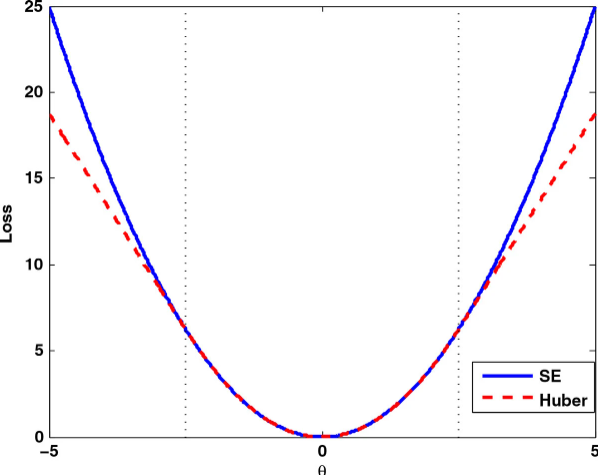

In [22]:
from sklearn.linear_model import HuberRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

This example was taken from the [Machine learning mastery blog](
https://machinelearningmastery.com/robust-regression-for-machine-learning-in-python/). First, create a function that generates data with outliers.

In [23]:
def get_dataset():
  X, y = make_regression(n_samples=100, n_features=1, tail_strength=0.9, effective_rank=1, n_informative=1, noise=3, bias=50, random_state=1)
  # add some artificial outliers
  np.random.seed(1)
  for i in range(10):
    factor = np.random.randint(2, 4)
    if np.random.random() > 0.5:
      X[i] += factor * X.std()
    else:
      X[i] -= factor * X.std()
  return X, y

Often, if we have outliers in the data, we try threat them as incorrect values and omit or replace them. However, this way we can omit important observations. Alternative way of handling data containing outliers is to user robust loss functions, which do not get influenced by the outliers as much as for example squarred loss.

First, we define a function `evaluate_model` that uses a repeated k-fold crossvalidation to evaluate a model. It performs validations with 3 folds to get more samples of the models and hence more reliable results.  

In [24]:
# evaluate a model
def evaluate_model(X, y, model):
 # define model evaluation method
 cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
 # evaluate model
 scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
 # force scores to be positive
 return np.abs(scores)

# plot the dataset and the model's line of best fit
def plot_best_fit(X, y, model):
 # fut the model on all data
 model.fit(X, y)
 # plot the dataset
 plt.scatter(X, y)
 # plot the line of best fit
 xaxis = np.arange(X.min(), X.max(), 0.01)
 yaxis = model.predict(xaxis.reshape((len(xaxis), 1)))
 plt.plot(xaxis, yaxis, color='r')
 # show the plot
 plt.title(type(model).__name__)
 plt.show()

First, we fit the model using linear regression and plot the results.

Mean MAE 5.030, (std:1.408)


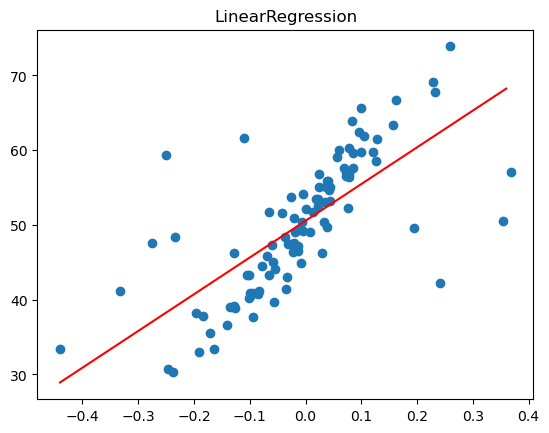

In [25]:
# load dataset
X, y = get_dataset()

model = LinearRegression()
# evaluate model
results = evaluate_model(X, y, model)
print(f"Mean MAE {np.mean(results):.3f}, (std:{np.std(results):.3f})")
# plot the line of best fit
plot_best_fit(X, y, model)

In the cell below define create a new instance of `HuberRegressor` with `epsilon` parameter setting the boundary for Huber loss equalt to 1 and `alpha` parameter controlling the amount of regularization equal to 0. The Huber loss is an example of loss function robust to outliers.

Mean MAE 4.284, (std:1.930)


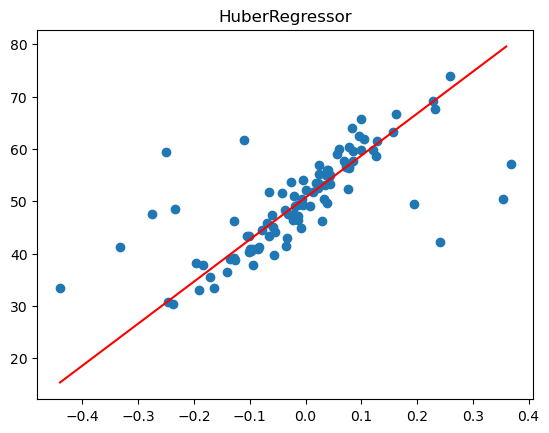

In [26]:

# define the model by calling the constructor
model = HuberRegressor(epsilon=1, alpha=0)
# evaluate model by calling the  evaluate_model function
results = evaluate_model(X, y, model)
print(f"Mean MAE {np.mean(results):.3f}, (std:{np.std(results):.3f})")
# plot the line of best fit
plot_best_fit(X, y, model)

Finally, you can compare the QuantileRegression model and compare its fit to Huber regressor.

Mean MAE 4.280, (std:1.929)


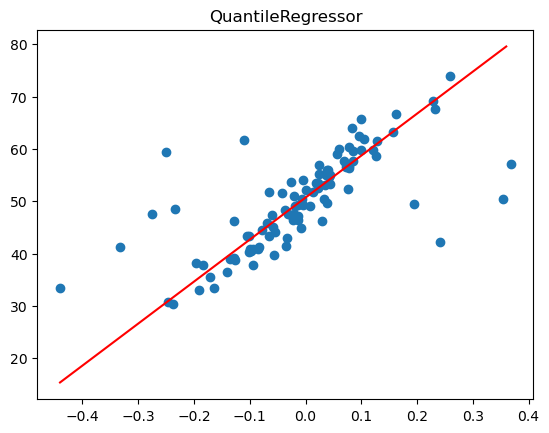

In [27]:
# define quantile regression model
model_QR = QuantileRegressor(quantile=0.5, alpha=0, solver = "highs")
# evaluate model
results = evaluate_model(X, y, model_QR)
print(f"Mean MAE {np.mean(results):.3f}, (std:{np.std(results):.3f})")
# plot the line of best fit
plot_best_fit(X, y, model_QR)

Which of the three used loss functions appear as robust to outliers? How did you notice this robustness? Print your answer below.

In [28]:
print("both qr and huber")

both qr and huber


# Defining custom loss functions with autograd

Here, we will use the autograd library to calculate gradients from the loss functions we will define. Since autograd is specially designed to automatically compute the derivative(s) of `numpy` code, it comes with its own distribution of `numpy` that is a wrapper and slightly modified versions of certain functionalities. You can use autograd's version of `numpy` exactly like you would the standard version - nothing about the user interface has been changed. Due to clarity, we will import autograd's `numpy` as `npa`.

In [29]:
import autograd.numpy as npa
from autograd import grad

First we define the linear model $y = \beta_1 x  + \beta_0$.

In [30]:
# Define the model
def model(params, x):
    return params[1] * x + params[0]

Next, we generate some simple data for the linear model.



In [31]:
x = npa.linspace(-5, 5, 100)
y = 3 + 2 * x + npa.random.normal(0, 1, size=len(x))

Below, we define the ERM with huber loss using `autograd.numpy` functions. Notice, we vectorize the function using `npa.where` as it is a piecewise function.

In [32]:
def huber(params, x, y, delta=1.0):
    resid = npa.abs(model(params, x) - y)
    huber_loss = npa.where(resid < delta, 0.5 * resid**2, delta * (resid - 0.5 * delta))
    res = npa.mean(huber_loss)
    return res

In a similar way, we define the ERM with squared error loss.

In [33]:
def se(params, x, y):
    resid = model(params, x) - y
    res = npa.mean(resid**2)
    return res

The loss functions will be optimized via the gradient descent below. Briefly inspect the function.

In [34]:
def grad_fun(x, y, loss_function, init_params=None, learning_rate=0.01, iterations=1000, verbose=False, **kwargs):
    # vector of zeros as default starting point if no value is provided
    if init_params is None:
      if len(x.shape) == 1:
        init_params = npa.zeros(2)
      else:
        init_params = npa.zeros(x.shape[1]+1)
    params = init_params
    # Compute the gradient
    gradient = grad(loss_function)
    # Gradient descent
    for i in range(iterations):
        params -= learning_rate * gradient(params, x, y, **kwargs)
        if i % 100 == 0 and verbose:
          print(f"iter: {i}, delta = {npa.round(learning_rate * gradient(params, x, y),6)}")

    return params

Here, we run the gradient for the generated `x` and `y` with squared error loss.

In [35]:
params = grad_fun(x, y, loss_function=se, init_params = npa.array([0., 0.]), learning_rate=1e-3, iterations = 2000, verbose = True)
print("Estimated parameters using chosen loss:", params)

iter: 0, delta = [-0.006358 -0.034094]
iter: 100, delta = [-0.005205 -0.006136]
iter: 200, delta = [-0.00426  -0.001104]
iter: 300, delta = [-0.003488 -0.000199]
iter: 400, delta = [-2.855e-03 -3.600e-05]
iter: 500, delta = [-2.337e-03 -6.000e-06]
iter: 600, delta = [-1.913e-03 -1.000e-06]
iter: 700, delta = [-0.001566 -0.      ]
iter: 800, delta = [-0.001282 -0.      ]
iter: 900, delta = [-0.001049 -0.      ]
iter: 1000, delta = [-0.000859 -0.      ]
iter: 1100, delta = [-0.000703 -0.      ]


iter: 1200, delta = [-0.000575 -0.      ]
iter: 1300, delta = [-0.000471 -0.      ]
iter: 1400, delta = [-0.000386 -0.      ]
iter: 1500, delta = [-0.000316 -0.      ]
iter: 1600, delta = [-0.000258 -0.      ]
iter: 1700, delta = [-0.000211 -0.      ]
iter: 1800, delta = [-0.000173 -0.      ]
iter: 1900, delta = [-0.000142 -0.      ]
Estimated parameters using chosen loss: [3.12748772 2.0398383 ]


MSE for the squared loss.

In [36]:
print(f"Squared loss MSE: {npa.mean(npa.abs((params[1] * x + params[0]) - y)):.5f}")

Squared loss MSE: 0.67447


Below, we run the gradient for the generated `x` and `y` with Huber error loss.

In [37]:
huber_params = grad_fun(x, y, loss_function=huber, init_params = npa.array([0., 0.]), learning_rate=1e-2, iterations = 2000, verbose = True)
# Print the parameters
print("Estimated parameters using Huber loss:", huber_params)

iter: 0, delta = [-0.003179 -0.022625]
iter: 100, delta = [-0.008471 -0.005681]


iter: 200, delta = [-0.008604 -0.002628]
iter: 300, delta = [-0.00643  -0.000305]
iter: 400, delta = [-3.443e-03  7.900e-05]
iter: 500, delta = [-1.622e-03  1.000e-05]
iter: 600, delta = [-7.3e-04  7.0e-06]
iter: 700, delta = [-3.4e-04  8.0e-06]
iter: 800, delta = [-1.61e-04  4.00e-06]
iter: 900, delta = [-7.7e-05  2.0e-06]
iter: 1000, delta = [-3.7e-05  1.0e-06]
iter: 1100, delta = [-1.8e-05  0.0e+00]
iter: 1200, delta = [-8.e-06  0.e+00]
iter: 1300, delta = [-4.e-06  0.e+00]
iter: 1400, delta = [-2.e-06  0.e+00]
iter: 1500, delta = [-1.e-06  0.e+00]
iter: 1600, delta = [-0.  0.]
iter: 1700, delta = [-0.  0.]
iter: 1800, delta = [-0.  0.]
iter: 1900, delta = [-0.  0.]
Estimated parameters using Huber loss: [3.1721033  2.04606968]


MSE for the Hubers loss.

In [38]:
print(f"Huber MSE: {npa.mean(npa.abs((huber_params[1] * x + huber_params[0]) - y)):.5f}")

Huber MSE: 0.67162


## Baking bread

In [39]:
#@title Obtaining the bread data
nobs = 1000
npa.random.seed(124)
x = npa.random.normal(6000, 500, size = nobs)
noise = npa.random.normal(0, 100, size = nobs)
y = x * 0.1 + noise + 10

In the data obtained above, `x` contains data about customers visiting the store in a day, `y` contains the amount of bread sold in a day. In the following parts, we will try to estimate regression coefficients and to predict the amount of bread sold in a day.


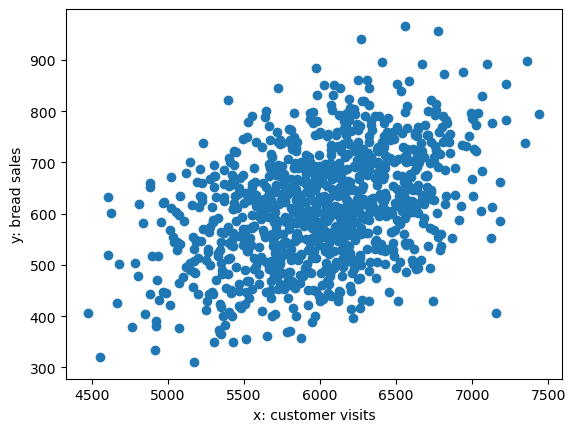

In [40]:
plt.plot()
plt.scatter(x, y)
plt.xlabel("x: customer visits")
plt.ylabel("y: bread sales")
plt.show()


You need to predict the amounts as you need to know how much bread to bake. You are selling the bread for 1.00€ (`item_price`) and the input costs are 0.50€ (`input_costs`). If we make too much bread, we can still sell it in discount for 15% of the price (`discount_price_prop`).


In [41]:
def calc_sales_vec(manufactured, real, item_price=1, discount_price_prop=0.15, input_costs=0.5):
  diff = real - manufactured
  revenue = npa.where(diff < 0,
           real * (item_price - input_costs) + (-1) * diff * (discount_price_prop * item_price - input_costs),
           manufactured * (item_price - input_costs) + diff * (input_costs - item_price) )
  return npa.sum(revenue)

As you can see, the overestimates and underestimates of the sales have different consequences, therefore, we should also consider this in the loss function.

First we define the residual as $r = y - \hat{y}$.
Let us consider the following loss function:

$f(r) =
\begin{cases} br^2~\text{if}~r \leq 0 \\
              ar^2~\text{if}~r > 0,
\end{cases}$

where $a,b \in \mathbb{R}$. Varying the $a,b$ parameter values we can create the asymmetry for the function.

 Below you have part of the loss defined, try to finish it. You can get inspired by the `huber` loss function defined above. We highly recommend to use the `np.where` function to vectorize the if statement about positive/negative residuals.

In [43]:
def asym_loss(params, x, y, a=1, b=1):
    resid =  y - model(params, x)
    loss = npa.where(resid <= 0, b * resid**2, a * resid**2)
    result = npa.mean(loss)
    return result

First, we calculate the earnings with the predictions by the squared error loss. Notice the init point and the learning rate.

In [44]:
params = grad_fun(x, y, loss_function=se, init_params = npa.array([13.0, 5.0]),
                  learning_rate=1e-9, iterations = 1000)
# residuals
se_resid = params[1] * x + params[0] - y
# Print the parameters
print("Estimated parameters using se loss:", params)
print(f"MAE: {npa.mean(npa.abs(se_resid)):.4f}")

print(f"Earnings with SE loss:\t{calc_sales_vec(params[1] * x + params[0], y):.3f}")

Estimated parameters using se loss: [12.99918991  0.10027927]
MAE: 81.1623
Earnings with SE loss:	252672.347


Now its your turn to do the same as above but with `asym_loss`. Compare results to the SE loss above, and try to find the values of $a,b$ parameters corresponding to highest earnings. The earnings should be higher than those achieved with the SE loss. The most comfortable way is to pass the `a`, `b` to the `grad_fun` as it containst `**kwargs` arguments passed to the loss function, e.g., `grad_fun(x, y, loss_function=asym_par, init_params = npa.array([13.0, 5.0]), learning_rate=1e-9, iterations = 1000, a=1, b=2)`.

In [45]:
def asym_fun(a, b):
  p_asym = grad_fun(x, y, loss_function=asym_loss, init_params = npa.array([13.0, 5.0]),
                  learning_rate=1e-9, iterations = 1000, a=a, b=b)
  asym_resid = p_asym[1] * x + p_asym[0] - y

  # Print the parameters
  print("Estimated parameters using asym loss:", p_asym)
  print(f"MAE: {npa.mean(npa.abs(asym_resid)):.4f}")

  print(f"Earnings with asym. loss:\t{calc_sales_vec(p_asym[1] * x + p_asym[0], y):.3f} a:{a} b:{b}")
  return calc_sales_vec(p_asym[1] * x + p_asym[0], y)

Print how many values overestimated the squared error loss and how many the asymmetric loss.

In [46]:
asym_fun(1, 0.186658)

Estimated parameters using asym loss: [12.99919148  0.1112112 ]
MAE: 96.0614
Earnings with asym. loss:	263936.858 a:1 b:0.186658


263936.85758088436

Estimated parameters using asym loss: [12.99919148  0.1112113 ]
MAE: 96.0617
Earnings with asym. loss:	263936.857 a:1 b:0.186655
Estimated parameters using asym loss: [12.99919148  0.11121127]
MAE: 96.0616
Earnings with asym. loss:	263936.857 a:1 b:0.186656
Estimated parameters using asym loss: [12.99919148  0.11121123]
MAE: 96.0615
Earnings with asym. loss:	263936.857 a:1 b:0.186657
Estimated parameters using asym loss: [12.99919148  0.1112112 ]
MAE: 96.0614
Earnings with asym. loss:	263936.858 a:1 b:0.186658
Estimated parameters using asym loss: [12.99919148  0.11121117]
MAE: 96.0613
Earnings with asym. loss:	263936.857 a:1 b:0.186659
Estimated parameters using asym loss: [12.99919148  0.11121113]
MAE: 96.0612
Earnings with asym. loss:	263936.857 a:1 b:0.18666


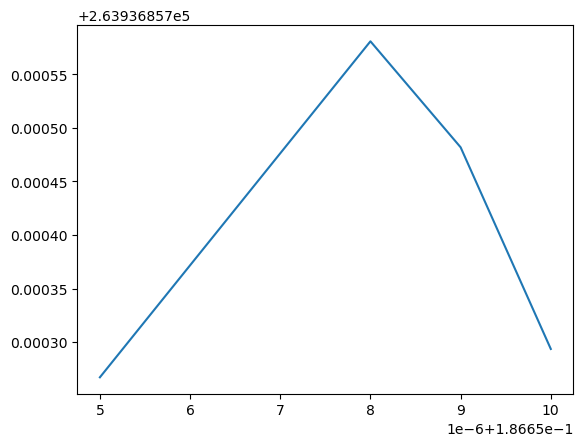

In [47]:
# Create an array to store the values
values = []

# Iterate over the range and save the results to the array
b_values = np.arange(0.186655, 0.18666, 0.000001)
for b in b_values:
    values.append(asym_fun(1, b))

# Convert the array to a NumPy array for easier manipulation
values_array = np.array(values)

# Plot the values
plt.plot(b_values, values_array)
plt.show()

Below, compare the histograms of residuals and try to print, which method produces more overestimates.

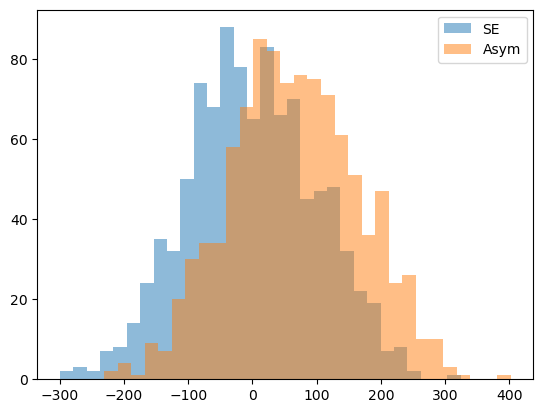

In [51]:
p_asym = grad_fun(x, y, loss_function=asym_loss, init_params = npa.array([13.0, 5.0]),
                  learning_rate=1e-9, iterations = 1000, a=1, b=0.186658)
asym_resid = p_asym[1] * x + p_asym[0] - y

plt.hist(se_resid, bins = 30, alpha =0.5, label = 'SE')
plt.hist(asym_resid, bins = 30, alpha =0.5, label = 'Asym')
plt.legend(loc='upper right')
plt.show()